In [32]:
import json
import matplotlib.pyplot as plt

# Load JSON data
with open('trainings/history/main/history_random_PPO19.json', 'r') as f:
    data_random = json.load(f)
with open('trainings/history/main/history_s_200k_PPO18.json', 'r') as f:
    data_skill = json.load(f)
with open('trainings/history/main/history_s+q_200k_PPO17.json', 'r') as f:
    data_skill_qtype = json.load(f)

# Store all datasets in a dictionary for easy EDA
all_data = {
    "random": data_random,
    "skill": data_skill,
    "skill_qtype": data_skill_qtype
}

# Example: Prepare lists for each dataset
summary = {}
for key, dataset in all_data.items():
    question_numbers = []
    student_performance = []
    avg_performance = []
    improvement = []
    answerability = []
    coverage = []
    skills = []
    for i, entry in enumerate(dataset):
        question_numbers.append(i+1)
        skills.append(entry['skill'])
        perf = entry['student_performance_per_skill'].get(entry['skill'], None)
        student_performance.append(perf)
        skill_values = list(entry['student_performance_per_skill'].values())
        avg_perf = sum(skill_values) / len(skill_values) if skill_values else None
        avg_performance.append(avg_perf)
        improvement.append(entry['improvement'])
        answerability.append(entry.get('answerability', None))
        coverage.append(entry.get('coverage', None))
    summary[key] = {
        "question_numbers": question_numbers,
        "student_performance": student_performance,
        "avg_performance": avg_performance,
        "improvement": improvement,
        "answerability": answerability,
        "coverage": coverage,
        "skills": skills
    }

# Now you can perform EDA on all datasets using the 'summary' dictionary.
# Example: summary['random']['student_performance'], summary['skill']['skills'], etc.
# ...existing code...

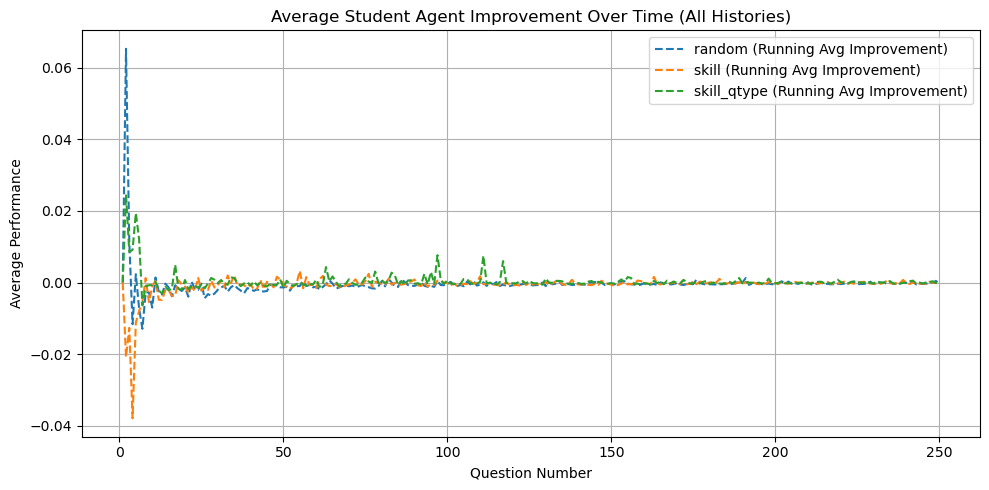

In [33]:
# Plot running average of improvement for all three histories on the same chart

plt.figure(figsize=(10,5))

for key, stats in summary.items():
    running_avg = []
    for i in range(len(stats["question_numbers"])):
        avg = sum(stats["improvement"][:i+1]) / (i+1)
        running_avg.append(avg)
    plt.plot(stats["question_numbers"], running_avg, linestyle='--', label=f'{key} (Running Avg Improvement)')

plt.title('Average Student Agent Improvement Over Time (All Histories)')
plt.xlabel('Question Number')
plt.ylabel('Average Performance')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

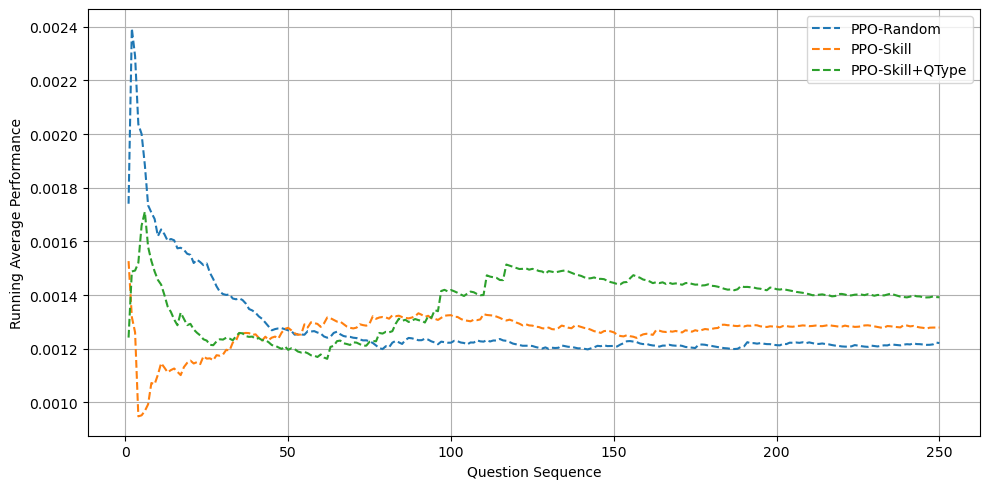

In [48]:
# Plot running average of avg_performance for all three PPO histories on the same chart

name_map = {
    "random": "PPO-Random",
    "skill": "PPO-Skill",
    "skill_qtype": "PPO-Skill+QType"
}

plt.figure(figsize=(10,5))

for key, stats in summary.items():
    running_avg_performance = []
    for i in range(len(stats["question_numbers"])):
        avg = sum(stats["avg_performance"][:i+1]) / (i+1)
        running_avg_performance.append(avg)
    plt.plot(
        stats["question_numbers"],
        running_avg_performance,
        linestyle='--',
        label=f'{name_map[key]}'
    )


plt.xlabel('Question Sequence')
plt.ylabel('Running Average Performance')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

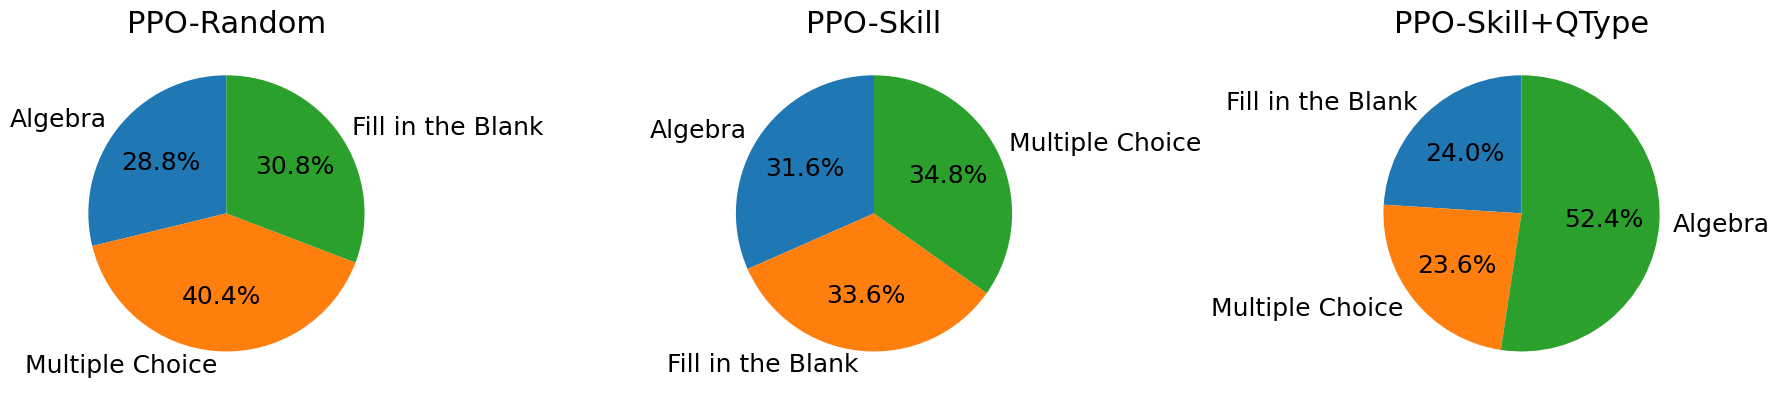

In [51]:
from collections import Counter

# Make all text bigger
plt.rcParams.update({'font.size': 18})

# Plot distribution of question types for all histories using pie charts
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
titles = {
    "random": "PPO-Random",
    "skill": "PPO-Skill",
    "skill_qtype": "PPO-Skill+QType"
}

for ax, (key, dataset) in zip(axes, all_data.items()):
    question_types = [entry['question_type'] for entry in dataset]
    question_type_counts = Counter(question_types)
    ax.pie(
        question_type_counts.values(),
        labels=question_type_counts.keys(),
        autopct='%1.1f%%',
        startangle=90,
        textprops={'fontsize': 18}
    )
    ax.set_title(titles[key], fontsize=22)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

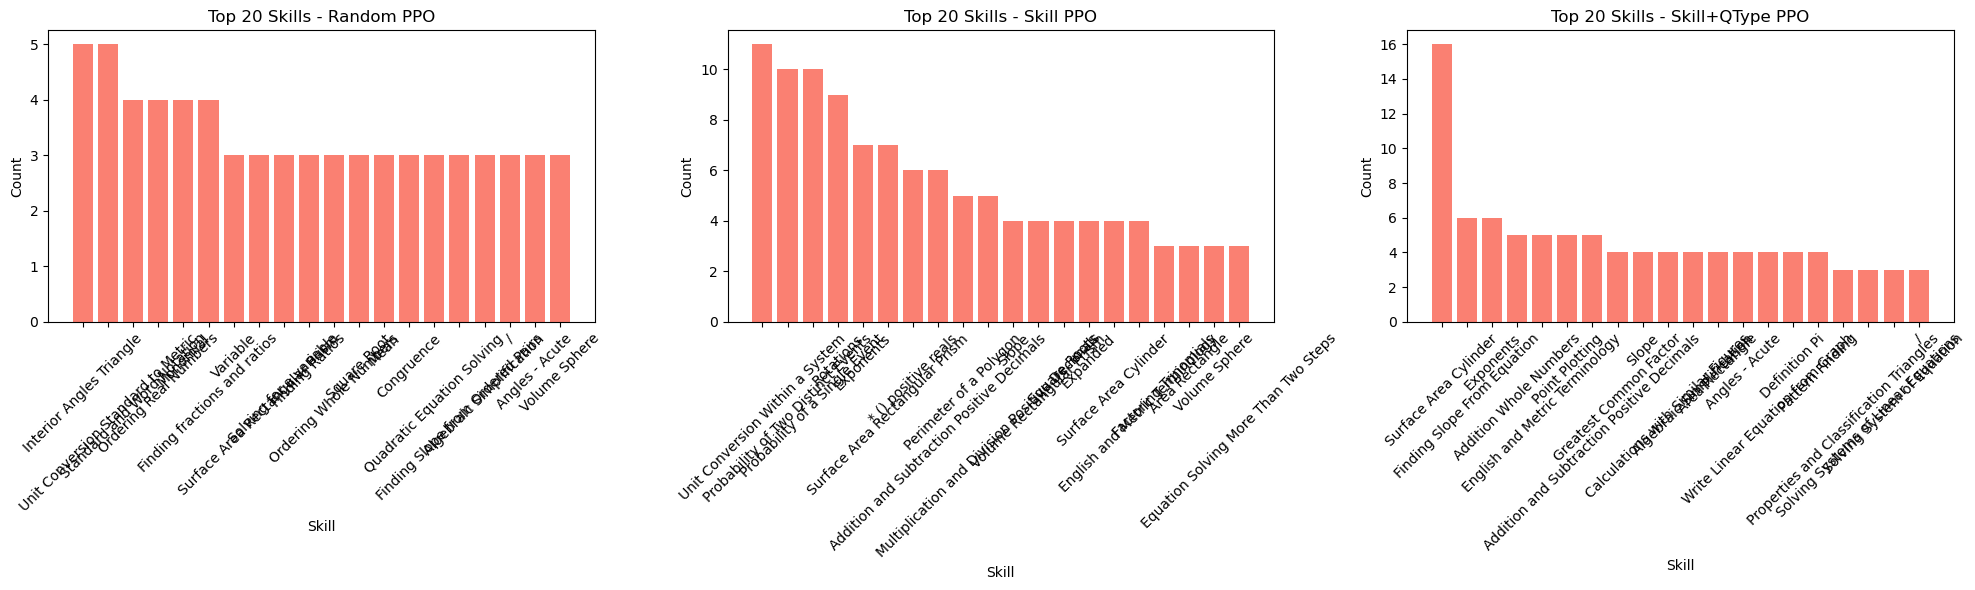

In [39]:
from collections import Counter

# Plot top 20 skills by frequency for all three PPO histories
fig, axes = plt.subplots(1, 3, figsize=(20, 6))
titles = {
    "random": "Top 20 Skills - Random PPO",
    "skill": "Top 20 Skills - Skill PPO",
    "skill_qtype": "Top 20 Skills - Skill+QType PPO"
}

for ax, (key, dataset) in zip(axes, all_data.items()):
    skills_list = [entry['skill'] for entry in dataset]
    skill_counts = Counter(skills_list)
    top_skills = skill_counts.most_common(20)
    if top_skills:  # Avoid error if no skills
        skills_names, skills_freqs = zip(*top_skills)
        ax.bar(skills_names, skills_freqs, color='salmon')
        ax.set_title(titles[key])
        ax.set_xlabel('Skill')
        ax.set_ylabel('Count')
        ax.tick_params(axis='x', rotation=45)
    else:
        ax.set_title(titles[key])
        ax.text(0.5, 0.5, 'No data', ha='center', va='center')

plt.tight_layout()
plt.show()

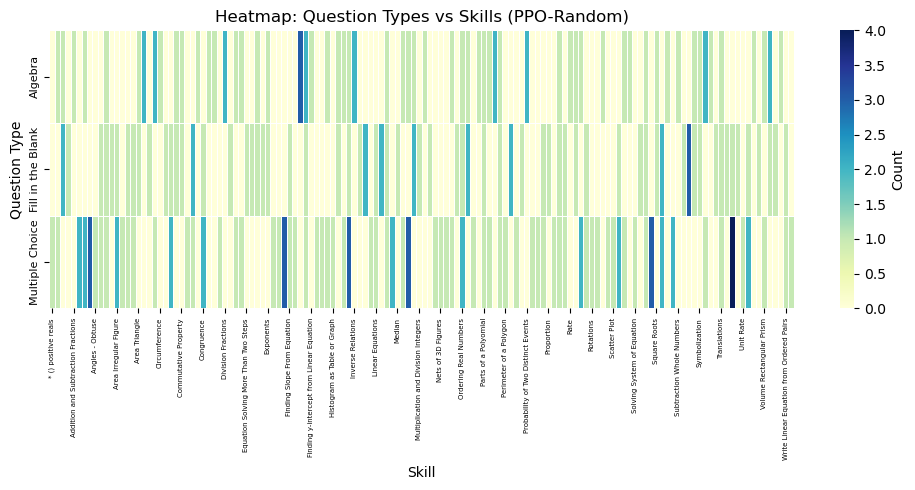

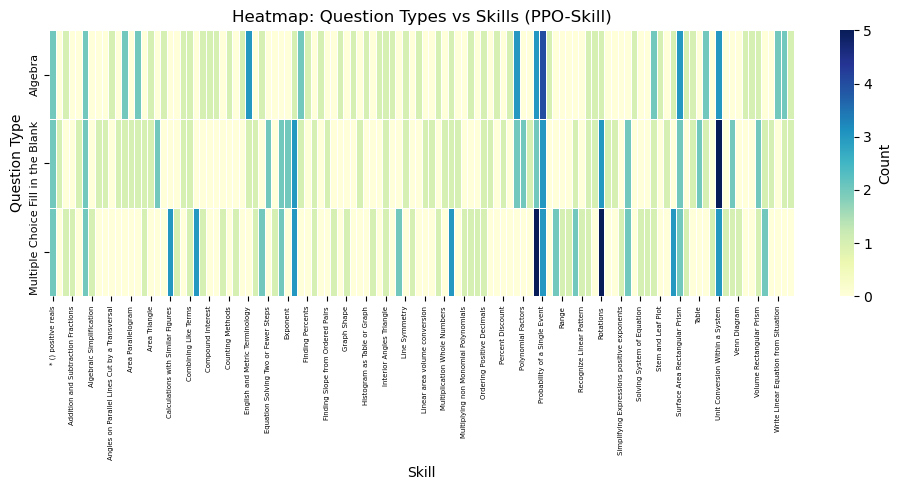

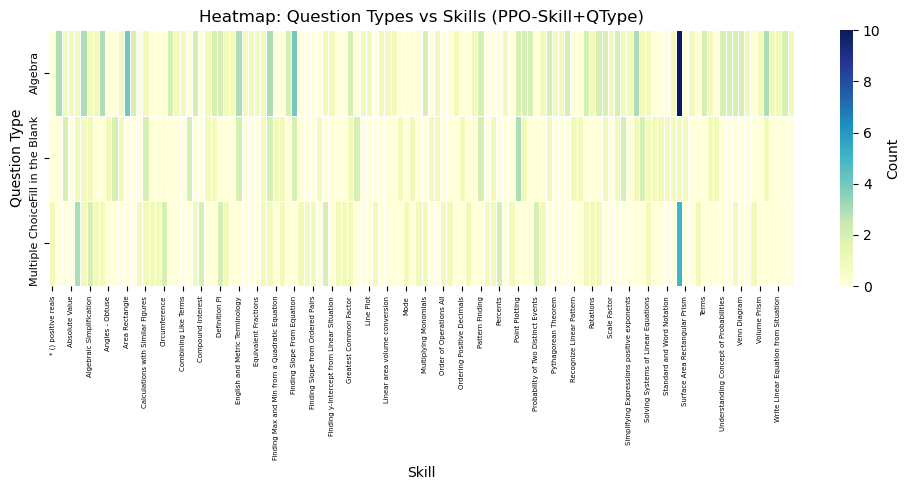

In [56]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Set smaller font size for all text
plt.rcParams.update({'font.size': 10})

titles = {
    "random": "Heatmap: Question Types vs Skills (PPO-Random)",
    "skill": "Heatmap: Question Types vs Skills (PPO-Skill)",
    "skill_qtype": "Heatmap: Question Types vs Skills (PPO-Skill+QType)"
}

for key, dataset in all_data.items():
    df = pd.DataFrame({
        'question_type': [entry['question_type'] for entry in dataset],
        'skill': [entry['skill'] for entry in dataset]
    })
    pivot = pd.pivot_table(df, index='question_type', columns='skill', aggfunc=len, fill_value=0)
    plt.figure(figsize=(10,5))
    sns.heatmap(pivot, cmap='YlGnBu', linewidths=0.5, cbar_kws={'label': 'Count'})
    plt.title(titles[key], fontsize=12)
    plt.xlabel('Skill', fontsize=10)
    plt.ylabel('Question Type', fontsize=10)
    plt.xticks(fontsize=5)
    plt.yticks(fontsize=8)
    plt.tight_layout()
    plt.show()

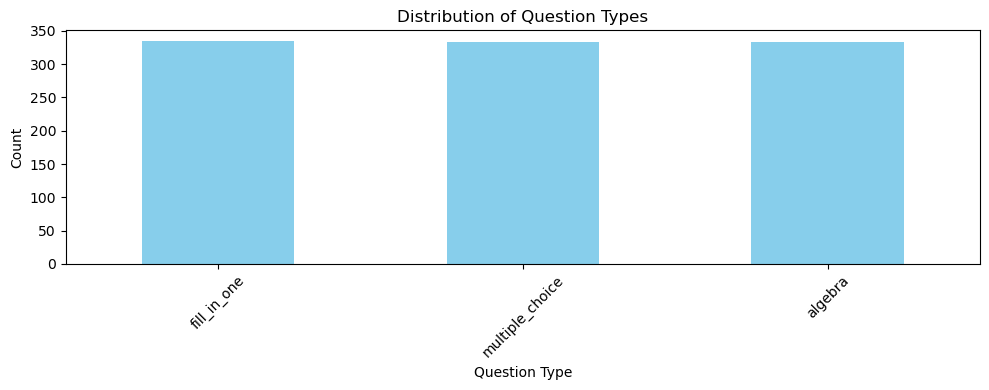

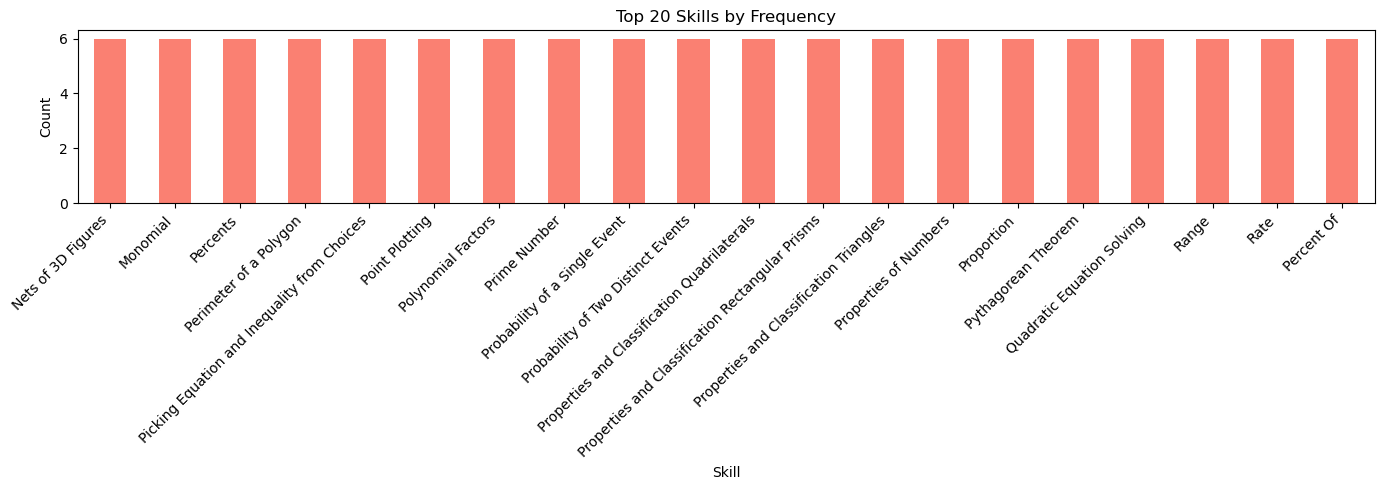

In [31]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file
df = pd.read_csv("data/questions.csv")

# Plot distribution of question types
plt.figure(figsize=(10, 4))
df['question_type'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Distribution of Question Types')
plt.xlabel('Question Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot distribution of skills
plt.figure(figsize=(14, 5))
df['skill'].value_counts().head(20).plot(kind='bar', color='salmon')
plt.title('Top 20 Skills by Frequency')
plt.xlabel('Skill')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()